<a href="https://colab.research.google.com/github/sona3ms/Mnist_dataset/blob/main/Loading_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!ls '/content/drive/My Drive'

 abhiram.gdoc
 abhiram.pdf
'adhar (1).pdf'
 adhar.pdf
 Ashok
 Atlas.gdoc
 Certificate
'Certificate for Sona Ms for "Test Your Knowledge of Corona Virus" (1).png'
'Certificate for Sona Ms for "Test Your Knowledge of Corona Virus".png'
 Certificates
 ChatBox.gdoc
'Colab Notebooks'
 Consent_Letter_Format_ASDC.gdoc
'Copy of Copy of ML and Data Science Preliminary Test_ (1).gdoc'
'Copy of Copy of ML and Data Science Preliminary Test_.gdoc'
'Copy of Copy of Week 4_Data Structure_Week 1.gdoc'
'Copy of Copy of Week 7_ Web Development.gdoc'
'Copy of Copy of Week 8_ Machine Learning.gdoc'
'Copy of Data (1).csv'
'Copy of Data.csv'
'Copy of Domain Fundamentals_Assignments_Python.gdoc'
'Copy of Sona M S 109 : Manifest File.gsheet'
'Copy of Week 0: Extra Assignment.gdoc'
'Copy of Week 1: Web Designing Basics.gdoc'
'Copy of Week 2_ Web Designing.docx'
'Copy of Week 3_ Domain Fundamentals.gdoc'
'Copy of  Week 5_Data Structure_Week 2.gdoc'
'Copy of Week 6_Data Strcuture_Week 3.gdoc'
'Copy of  Week 9_ M

In [15]:
# List files in the 'Datasets' directory
!ls '/content/drive/My Drive/PetImages'


Cat  Dog


In [16]:
file_path = '/content/drive/My Drive/PetImages'
os.listdir(file_path)


['Dog', 'Cat']

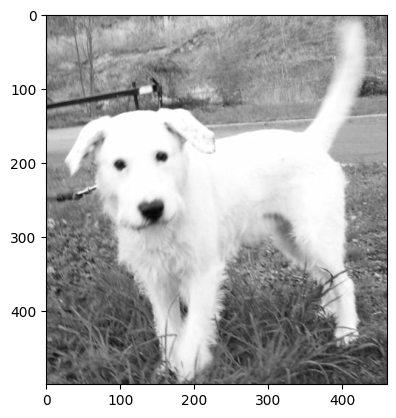

In [18]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
# Reading a CSV file
file_path = '/content/drive/My Drive/PetImages'
categories = ['Dog','Cat']

for category in categories:
  path = os.path.join(file_path,category) # path to cats and dogs dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

In [19]:
print(img_array)#this is how our data looks like

[[157 142 131 ... 102  86 122]
 [151 140 131 ... 100  79 110]
 [146 137 130 ... 102  82 113]
 ...
 [112 108 113 ...  79  89  92]
 [116 112 115 ...  71  77  78]
 [115 109 111 ...  65  68  68]]


In [20]:
print(img_array.shape)

(500, 461)


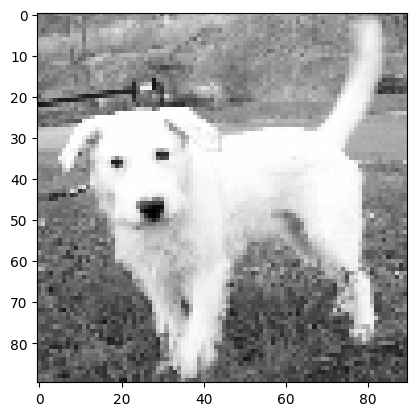

In [21]:
#normalize cheiyenm, ellam same dimention akuva
img_size = 90
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [22]:
training_data = []
def create_training_data():
  for category in categories:
    path = os.path.join(file_path,category) # path to cats and dogs dir
    class_num = categories.index(category)#dog AND CAT- NUM AKI ENCODE AKUVA
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        # print(f"Error occurred while processing {img} in {category}: {e}")
        pass

create_training_data()

In [23]:
print(len(training_data))

24956


In [24]:
import random
random.shuffle(training_data)

In [25]:
for sample in training_data[:10]:
  print(sample[1])

1
0
0
0
0
0
1
1
1
0


In [26]:
x = []
y = []


In [28]:
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1,img_size,img_size,1)

In [30]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [31]:
pickle_in= open("x.pickle","rb")
x = pickle.load(pickle_in)

In [32]:
x[1]

array([[[ 59],
        [ 54],
        [ 56],
        ...,
        [ 79],
        [ 98],
        [ 49]],

       [[ 49],
        [ 47],
        [ 48],
        ...,
        [ 93],
        [122],
        [ 69]],

       [[ 51],
        [ 54],
        [ 54],
        ...,
        [ 54],
        [ 67],
        [ 39]],

       ...,

       [[124],
        [132],
        [129],
        ...,
        [ 76],
        [ 53],
        [ 50]],

       [[134],
        [145],
        [135],
        ...,
        [ 80],
        [ 56],
        [ 46]],

       [[143],
        [147],
        [135],
        ...,
        [ 74],
        [ 54],
        [ 44]]], dtype=uint8)

#CNN